In [1]:
import pandas as panda
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [4]:
# Function to preprocess data
def preprocessData(file_path):
    data = panda.read_csv(file_path)
    data['Date'] = panda.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['DayOfYear'] = data['Date'].dt.dayofyear
    return data

In [5]:
# Function to calculate monthly average passengers
def calculateMonthlyAverages(data):
    return data.groupby('Month')['Number'].mean()


In [6]:
# Function to perform Fourier transform
def performFourierTransform(data):
    passengerVariation = np.array(data['Number'].fillna(0))
    transform = fft(passengerVariation)
    frequencies = np.fft.fftfreq(len(passengerVariation))
    return transform, frequencies

In [7]:
# Function to plot results
def plotResults(data, monthlyAvg, fourierTransform, studentId):
    plt.figure(figsize=(12, 6))

    # Bar chart for monthly averages
    months = range(1, 13)
    plt.bar(months, monthlyAvg, color='skyblue', label='Monthly Average')

    # Fourier approximation with first 8 terms
    passengerVariation = np.array(data['Number'].fillna(0))
    fourierSeriesApprox = np.zeros_like(passengerVariation, dtype=float)
    for k in range(1, 9):  # First 8 terms
        fourierSeriesApprox += (2 * np.real(fourierTransform[k]) * np.cos(2 * np.pi * k * data['DayOfYear'] / 365) +
                                  2 * np.imag(fourierTransform[k]) * np.sin(2 * np.pi * k * data['DayOfYear'] / 365)) / len(data)

    plt.plot(data['DayOfYear'], fourierSeriesApprox, color='orange', label='Fourier Approximation')

    # Labels and legend
    plt.title(f'Average Daily Passenger Numbers (Student ID: {studentId})')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Passengers')
    plt.xticks(ticks=months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid()
    plt.show()

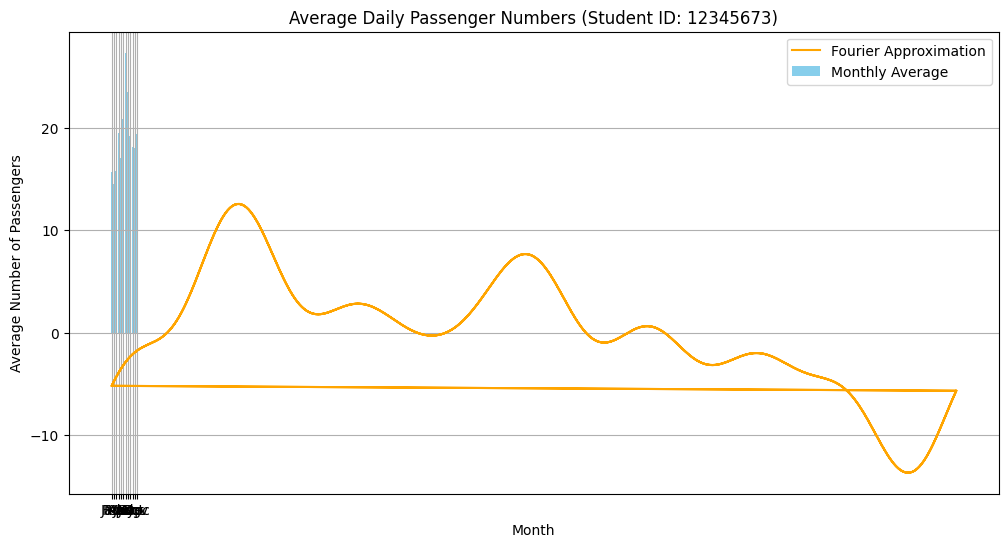

In [9]:
# Main script
if __name__ == "__main__":
    # File path to the dataset
    filePath = "/content/airline3.csv"  # Replace with the correct path
    studentId = "12345673"  # Replace with your student ID

    # Step 1: Preprocess data
    data = preprocessData(filePath)

    # Step 2: Calculate monthly averages
    monthlyAvgPassengers = calculateMonthlyAverages(data)

    # Step 3: Perform Fourier Transform
    fourierTransform, frequencies = performFourierTransform(data)

    # Step 4: Plot studentId
    plotResults(data, monthlyAvgPassengers, fourierTransform, studentId)